In [1]:
# time series analysis

# !pip install statsmodels
# !pip install statsmodels --upgrade

In [2]:
# !pip install pmdarima
import warnings
warnings.filterwarnings("ignore")


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_datareader as pdr
from pandas_profiling import ProfileReport

In [4]:
%matplotlib inline
import matplotlib
import seaborn as sns
%reload_ext autoreload
%autoreload 2

import datetime
from datetime import datetime

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [6]:
# pdr. used for getting data from (website) 

gs = pdr.get_data_yahoo('GS')
gs.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-21,222.399994,219.210007,222.399994,220.789993,2203300.0,201.017822
2017-08-22,223.779999,221.330002,221.860001,223.580002,2021300.0,203.557983
2017-08-23,224.809998,221.330002,221.899994,222.740005,2568000.0,202.793198
2017-08-24,224.570007,222.589996,223.770004,222.990005,2263000.0,203.020813
2017-08-25,224.949997,222.130005,223.639999,222.470001,2232500.0,202.547363


In [7]:
type(gs)

pandas.core.frame.DataFrame

In [8]:
gs.index

DatetimeIndex(['2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28', '2017-08-29', '2017-08-30',
               '2017-08-31', '2017-09-01',
               ...
               '2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11',
               '2022-08-12', '2022-08-15', '2022-08-16', '2022-08-17',
               '2022-08-18', '2022-08-19'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [9]:
index = gs.loc['2020-07-01':'2022-07-01'].index
index

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-13',
               '2020-07-14', '2020-07-15',
               ...
               '2022-06-17', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-27', '2022-06-28', '2022-06-29',
               '2022-06-30', '2022-07-01'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

In [10]:
# from mplfinance.original_flavor import candlestick_ohlc

In [11]:

#gs_new = gs[['Date', 'Open', 'High','Low', 'Close']]



# fig, ax = plt.subplots()
# candlestick_ohlc(ax, gs.values, width = 0.6,colorup = 'green', colordown = 'red',alpha = 0.8);

# Formatting Date

# fig.autofmt_xdate()
 
# fig.tight_layout()

# plt.show()

In [12]:
gs.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-15,358.619995,349.049988,351.000000,355.850006,2045700.0,355.850006
2022-08-16,356.470001,352.019989,352.989990,354.970001,1740900.0,354.970001
2022-08-17,355.589996,350.769989,351.899994,353.739990,1576300.0,353.739990
2022-08-18,355.100006,350.859985,352.660004,354.519989,1102200.0,354.519989
2022-08-19,351.859985,347.500000,351.000000,349.269989,1811900.0,349.269989


<AxesSubplot:xlabel='Date'>

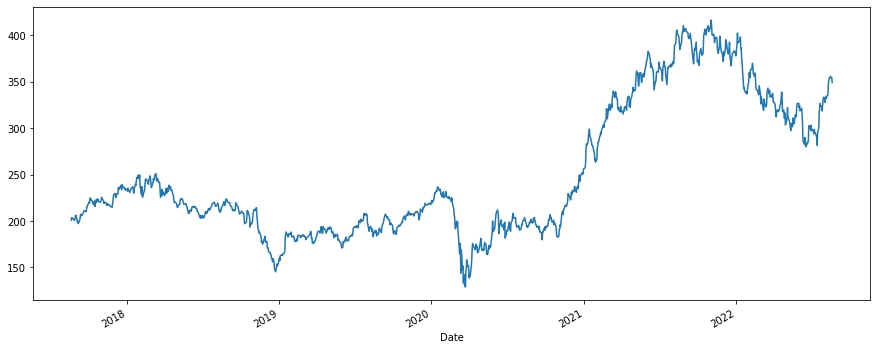

In [13]:
gs['Adj Close'].plot(figsize=(15,6))

In [14]:
Adj_close = gs.loc['2020-07-01':'2022-08-01']['Adj Close']
Adj_close

Date
2020-07-01    189.660507
2020-07-02    189.497299
2020-07-06    199.058563
2020-07-07    191.378830
2020-07-08    194.153137
                 ...    
2022-07-26    318.549988
2022-07-27    324.540009
2022-07-28    329.109985
2022-07-29    333.390015
2022-08-01    332.079987
Name: Adj Close, Length: 525, dtype: float64

In [15]:
index = gs.loc['2020-07-01':'2022-08-01'].index
index

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-13',
               '2020-07-14', '2020-07-15',
               ...
               '2022-07-19', '2022-07-20', '2022-07-21', '2022-07-22',
               '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28',
               '2022-07-29', '2022-08-01'],
              dtype='datetime64[ns]', name='Date', length=525, freq=None)

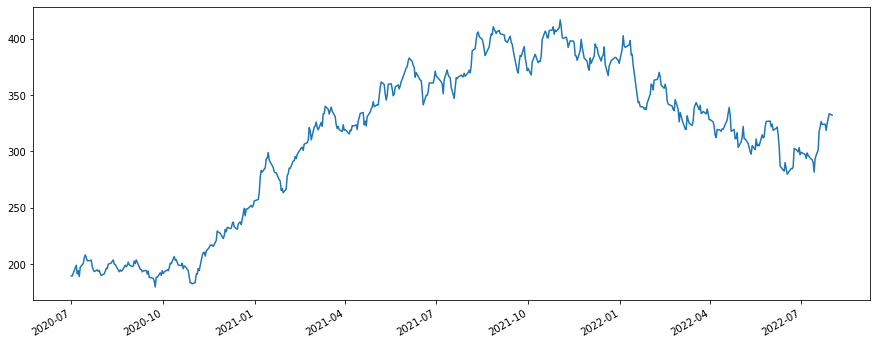

In [16]:
figure,ax = plt.subplots(figsize=(15,6))

plt.tight_layout

figure.autofmt_xdate()

ax.plot(index,Adj_close)

<AxesSubplot:xlabel='Date'>

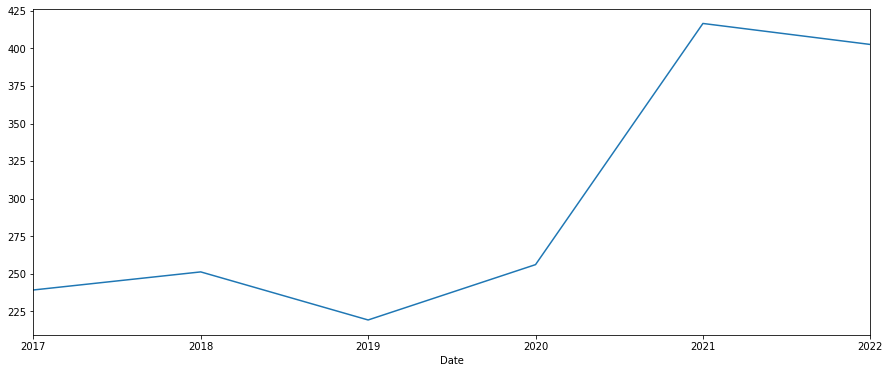

In [17]:
gs.resample(rule='A').max()['Adj Close'].plot(figsize=(15,6))          # yearly plot

<AxesSubplot:xlabel='Date'>

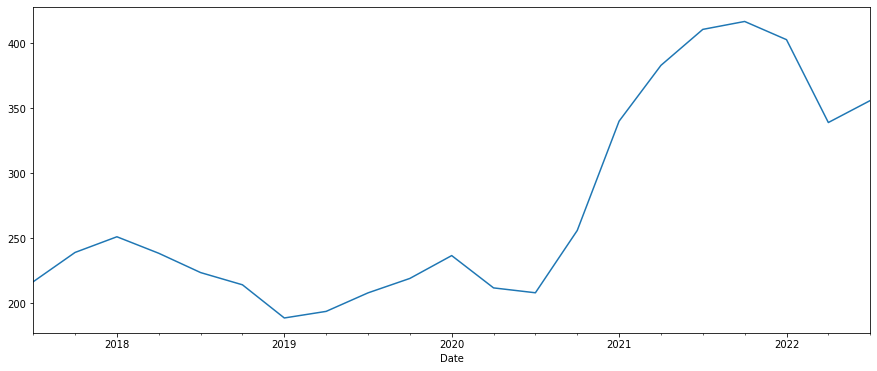

In [18]:
gs.resample(rule='QS').max()['Adj Close'].plot(figsize=(15,6))          # quaterly plot

<AxesSubplot:xlabel='Date'>

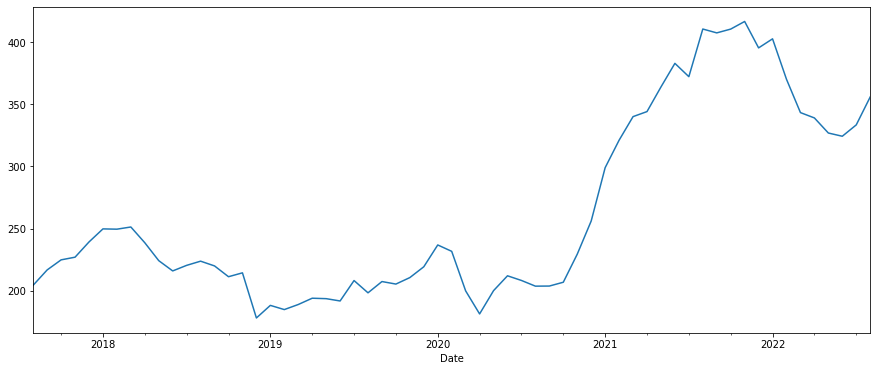

In [19]:
gs.resample(rule='M').max()['Adj Close'].plot(figsize=(15,6))              # monthly plot

<AxesSubplot:xlabel='Date'>

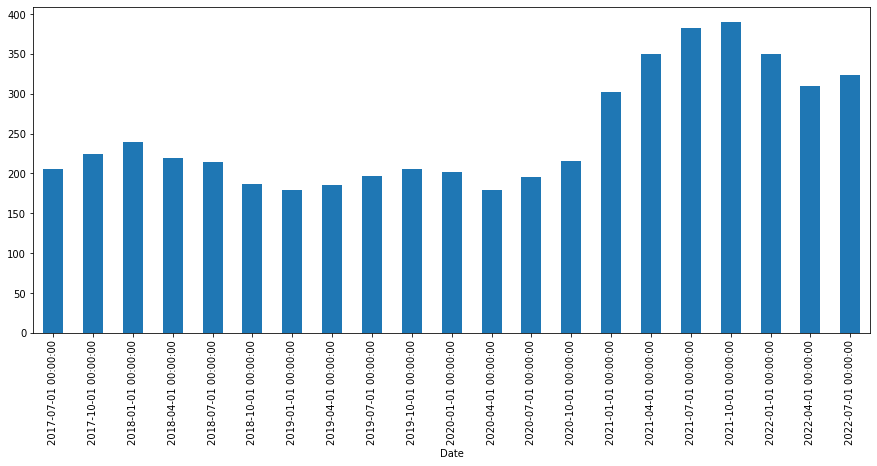

In [20]:
figure.autofmt_xdate()

gs['Adj Close'].resample(rule='QS').mean().plot(kind='bar',figsize=(15,6))

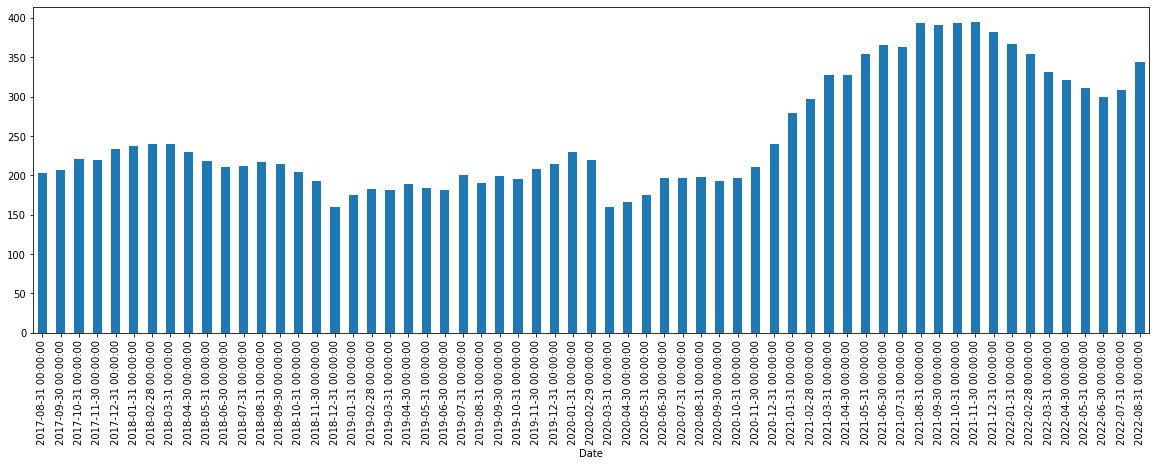

In [21]:
gs['Adj Close'].resample(rule='M').mean().plot(kind='bar',figsize=(20,6))
figure.autofmt_xdate()

<AxesSubplot:xlabel='Date'>

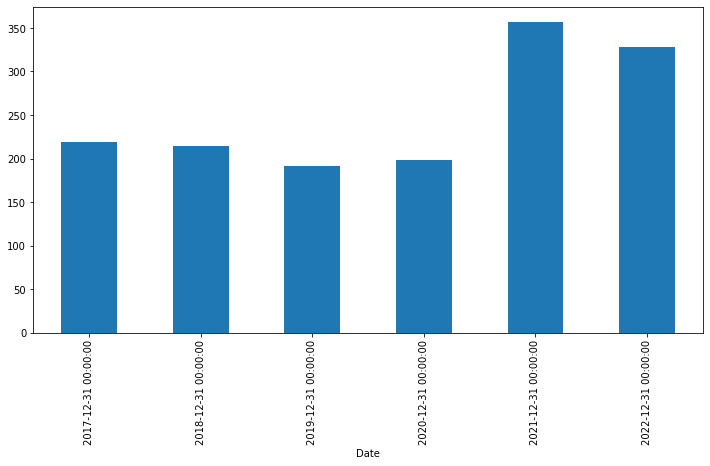

In [22]:
gs['Adj Close'].resample(rule='A').mean().plot(kind='bar',figsize=(12,6))

In [23]:
Adj_close

Date
2020-07-01    189.660507
2020-07-02    189.497299
2020-07-06    199.058563
2020-07-07    191.378830
2020-07-08    194.153137
                 ...    
2022-07-26    318.549988
2022-07-27    324.540009
2022-07-28    329.109985
2022-07-29    333.390015
2022-08-01    332.079987
Name: Adj Close, Length: 525, dtype: float64

In [24]:
gs.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-21,222.399994,219.210007,222.399994,220.789993,2203300.0,201.017822
2017-08-22,223.779999,221.330002,221.860001,223.580002,2021300.0,203.557983
2017-08-23,224.809998,221.330002,221.899994,222.740005,2568000.0,202.793198
2017-08-24,224.570007,222.589996,223.770004,222.990005,2263000.0,203.020813
2017-08-25,224.949997,222.130005,223.639999,222.470001,2232500.0,202.547363


In [25]:
# simple moving avg(rolling(window = 5))

gs['Adj Close : 5 days Rolling'] = gs['Adj Close'].rolling(5).mean()
gs['Adj Close : 5 days Rolling']

Date
2017-08-21           NaN
2017-08-22           NaN
2017-08-23           NaN
2017-08-24           NaN
2017-08-25    202.587436
                 ...    
2022-08-15    349.176001
2022-08-16    352.846002
2022-08-17    354.012000
2022-08-18    354.579999
2022-08-19    353.669995
Name: Adj Close : 5 days Rolling, Length: 1259, dtype: float64

In [26]:
gs.head()

,High,Low,Open,Close,Volume,Adj Close,Adj Close : 5 days Rolling
Date,,,,,,,
2017-08-21,222.399994,219.210007,222.399994,220.789993,2203300.0,201.017822,NaN
2017-08-22,223.779999,221.330002,221.860001,223.580002,2021300.0,203.557983,NaN
2017-08-23,224.809998,221.330002,221.899994,222.740005,2568000.0,202.793198,NaN
2017-08-24,224.570007,222.589996,223.770004,222.990005,2263000.0,203.020813,NaN
2017-08-25,224.949997,222.130005,223.639999,222.470001,2232500.0,202.547363,202.587436


In [27]:
gs['Adj Close : 15 days Rolling'] = gs['Adj Close'].rolling(15).mean()
gs['Adj Close : 15 days Rolling']

Date
2017-08-21           NaN
2017-08-22           NaN
2017-08-23           NaN
2017-08-24           NaN
2017-08-25           NaN
                 ...    
2022-08-15    336.388000
2022-08-16    338.816001
2022-08-17    340.762667
2022-08-18    342.456667
2022-08-19    343.515332
Name: Adj Close : 15 days Rolling, Length: 1259, dtype: float64

In [28]:
gs['Adj Close : 30 days Rolling'] = gs['Adj Close'].rolling(30).mean()
gs['Adj Close : 30 days Rolling']

Date
2017-08-21           NaN
2017-08-22           NaN
2017-08-23           NaN
2017-08-24           NaN
2017-08-25           NaN
                 ...    
2022-08-15    319.950667
2022-08-16    321.876334
2022-08-17    323.875666
2022-08-18    325.739666
2022-08-19    327.499665
Name: Adj Close : 30 days Rolling, Length: 1259, dtype: float64

In [29]:
gs.head(20)

,High,Low,Open,Close,Volume,Adj Close,Adj Close : 5 days Rolling,Adj Close : 15 days Rolling,Adj Close : 30 days Rolling
Date,,,,,,,,,
2017-08-21,222.399994,219.210007,222.399994,220.789993,2203300.0,201.017822,NaN,NaN,NaN
2017-08-22,223.779999,221.330002,221.860001,223.580002,2021300.0,203.557983,NaN,NaN,NaN
2017-08-23,224.809998,221.330002,221.899994,222.740005,2568000.0,202.793198,NaN,NaN,NaN
2017-08-24,224.570007,222.589996,223.770004,222.990005,2263000.0,203.020813,NaN,NaN,NaN
2017-08-25,224.949997,222.130005,223.639999,222.470001,2232500.0,202.547363,202.587436,NaN,NaN
2017-08-28,223.089996,218.860001,222.910004,220.350006,2641600.0,200.617233,202.507318,NaN,NaN
2017-08-29,220.130005,215.750000,217.270004,219.960007,2369100.0,200.946091,201.984940,NaN,NaN
2017-08-30,224.220001,220.089996,220.250000,222.419998,2411400.0,203.193451,202.064990,NaN,NaN
2017-08-31,224.490005,222.580002,223.250000,223.740005,2240600.0,204.399338,202.340695,NaN,NaN


<AxesSubplot:xlabel='Date'>

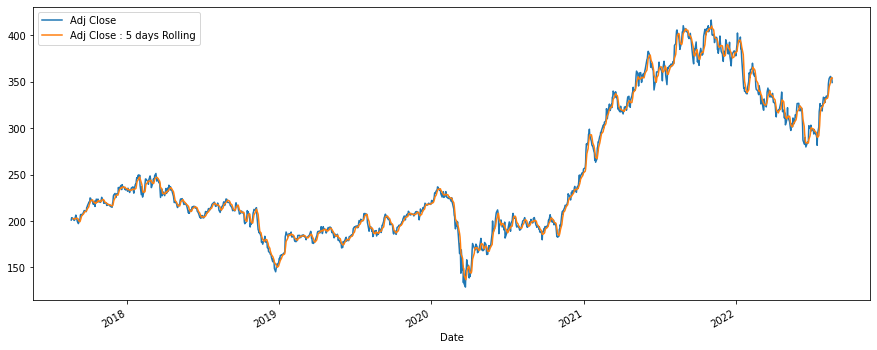

In [30]:
gs[['Adj Close','Adj Close : 5 days Rolling']].plot(figsize=(15,6))


<AxesSubplot:xlabel='Date'>

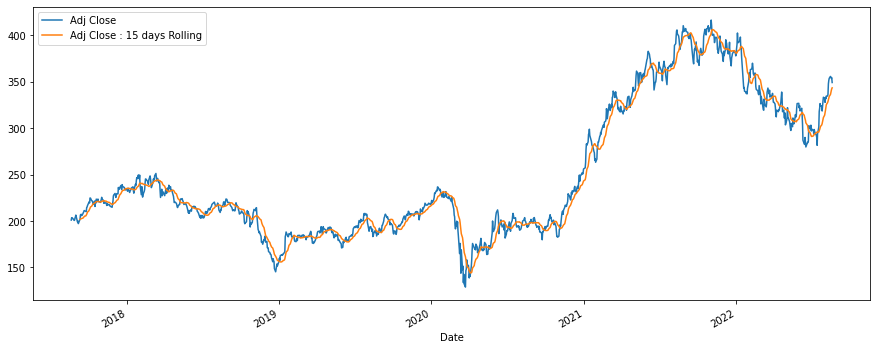

In [31]:
gs[['Adj Close','Adj Close : 15 days Rolling']].plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

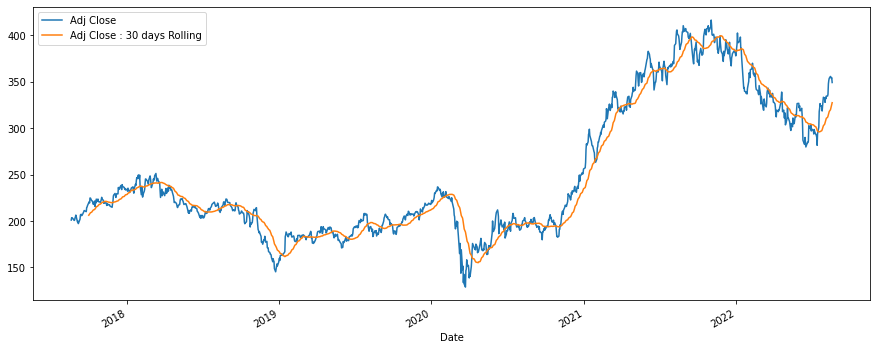

In [32]:
gs[['Adj Close','Adj Close : 30 days Rolling']].plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

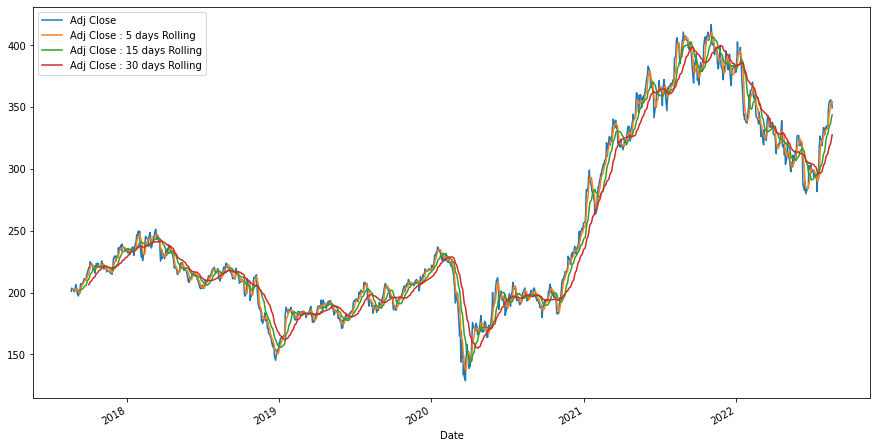

In [33]:
gs[['Adj Close','Adj Close : 5 days Rolling','Adj Close : 15 days Rolling','Adj Close : 30 days Rolling']].plot(figsize=(15,8))

In [34]:
# CMA(cummulative moving avg) = gs['Adj Close'].expanding(5).mean()

gs['Adj Close : 5 days CMA'] = gs['Adj Close'].expanding(5).mean()
gs['Adj Close : 5 days CMA']

Date
2017-08-21           NaN
2017-08-22           NaN
2017-08-23           NaN
2017-08-24           NaN
2017-08-25    202.587436
                 ...    
2022-08-15    249.519950
2022-08-16    249.603907
2022-08-17    249.686752
2022-08-18    249.770086
2022-08-19    249.849116
Name: Adj Close : 5 days CMA, Length: 1259, dtype: float64

In [35]:
gs['Adj Close : 15 days CMA'] = gs['Adj Close'].expanding(15).mean()
gs['Adj Close : 15 days CMA']

Date
2017-08-21           NaN
2017-08-22           NaN
2017-08-23           NaN
2017-08-24           NaN
2017-08-25           NaN
                 ...    
2022-08-15    249.519950
2022-08-16    249.603907
2022-08-17    249.686752
2022-08-18    249.770086
2022-08-19    249.849116
Name: Adj Close : 15 days CMA, Length: 1259, dtype: float64

In [36]:
gs['Adj Close : 30 days CMA'] = gs['Adj Close'].expanding(30).mean()
gs['Adj Close : 30 days CMA']

Date
2017-08-21           NaN
2017-08-22           NaN
2017-08-23           NaN
2017-08-24           NaN
2017-08-25           NaN
                 ...    
2022-08-15    249.519950
2022-08-16    249.603907
2022-08-17    249.686752
2022-08-18    249.770086
2022-08-19    249.849116
Name: Adj Close : 30 days CMA, Length: 1259, dtype: float64

<AxesSubplot:xlabel='Date'>

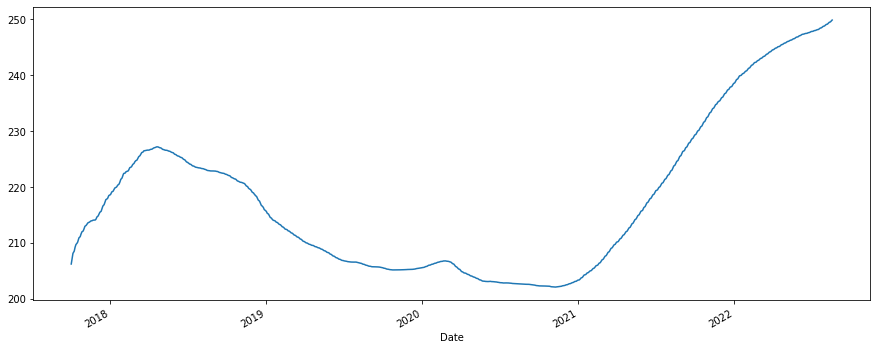

In [37]:
gs['Adj Close : 30 days CMA'].plot(figsize=(15,6))

In [38]:
gs.head(20)

,High,Low,Open,Close,Volume,Adj Close,Adj Close : 5 days Rolling,Adj Close : 15 days Rolling,Adj Close : 30 days Rolling,Adj Close : 5 days CMA,Adj Close : 15 days CMA,Adj Close : 30 days CMA
Date,,,,,,,,,,,,
2017-08-21,222.399994,219.210007,222.399994,220.789993,2203300.0,201.017822,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-22,223.779999,221.330002,221.860001,223.580002,2021300.0,203.557983,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-23,224.809998,221.330002,221.899994,222.740005,2568000.0,202.793198,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-24,224.570007,222.589996,223.770004,222.990005,2263000.0,203.020813,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-25,224.949997,222.130005,223.639999,222.470001,2232500.0,202.547363,202.587436,NaN,NaN,202.587436,NaN,NaN
2017-08-28,223.089996,218.860001,222.910004,220.350006,2641600.0,200.617233,202.507318,NaN,NaN,202.259069,NaN,NaN
2017-08-29,220.130005,215.750000,217.270004,219.960007,2369100.0,200.946091,201.984940,NaN,NaN,202.071501,NaN,NaN
2017-08-30,224.220001,220.089996,220.250000,222.419998,2411400.0,203.193451,202.064990,NaN,NaN,202.211744,NaN,NaN
2017-08-31,224.490005,222.580002,223.250000,223.740005,2240600.0,204.399338,202.340695,NaN,NaN,202.454810,NaN,NaN


<AxesSubplot:xlabel='Date'>

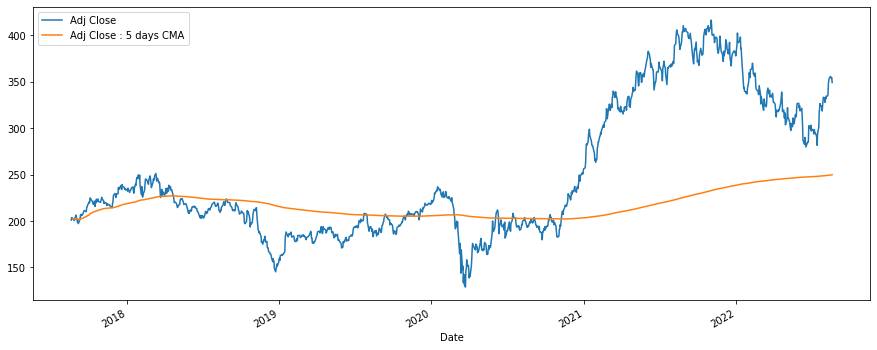

In [39]:
gs[['Adj Close','Adj Close : 5 days CMA']].plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

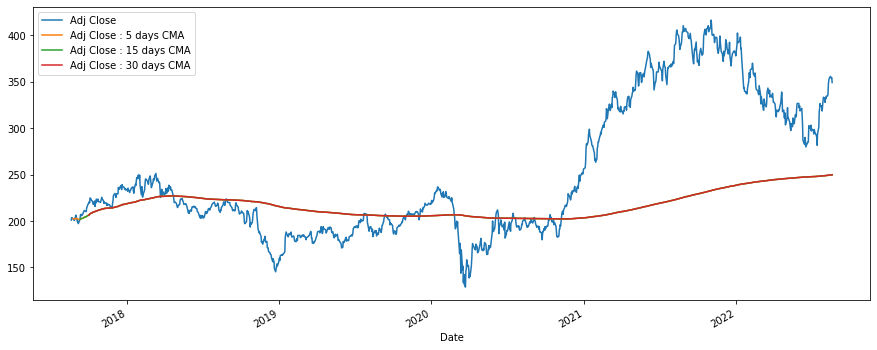

In [40]:
gs[['Adj Close','Adj Close : 5 days CMA','Adj Close : 15 days CMA','Adj Close : 30 days CMA']].plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

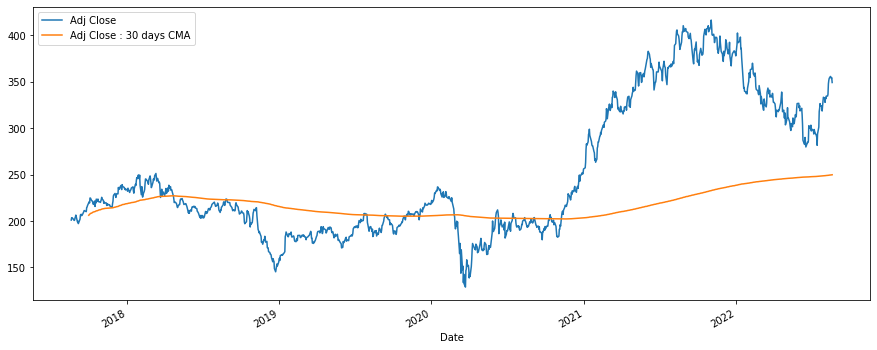

In [41]:
gs[['Adj Close','Adj Close : 30 days CMA']].plot(figsize=(15,6))

In [42]:
gs.tail(20)

,High,Low,Open,Close,Volume,Adj Close,Adj Close : 5 days Rolling,Adj Close : 15 days Rolling,Adj Close : 30 days Rolling,Adj Close : 5 days CMA,Adj Close : 15 days CMA,Adj Close : 30 days CMA
Date,,,,,,,,,,,,
2022-07-25,327.290009,322.600006,325.970001,324.119995,4024500.0,324.119995,322.817999,303.513334,297.283002,248.469127,248.469127,248.469127
2022-07-26,324.290009,317.760010,321.769989,318.549988,2054700.0,318.549988,322.917999,304.936666,298.334002,248.525598,248.525598,248.525598
2022-07-27,326.390015,318.380005,320.290009,324.540009,2081900.0,324.540009,323.535999,306.988666,299.708002,248.586802,248.586802,248.586802
2022-07-28,329.980011,321.890015,325.299988,329.109985,1820700.0,329.109985,324.049994,309.022664,301.260334,248.651583,248.651583,248.651583
2022-07-29,335.179993,329.500000,329.500000,333.390015,2112200.0,333.390015,325.941998,311.483999,302.704335,248.719701,248.719701,248.719701
2022-08-01,334.799988,329.010010,331.730011,332.079987,1476500.0,332.079987,327.533997,314.077332,304.274334,248.786657,248.786657,248.786657
2022-08-02,331.829987,327.220001,329.500000,327.880005,1862900.0,327.880005,329.400000,316.433999,305.877334,248.850135,248.850135,248.850135
2022-08-03,335.510010,329.619995,332.070007,333.170013,1770600.0,333.170013,331.126001,319.302000,307.489334,248.917753,248.917753,248.917753
2022-08-04,334.299988,330.619995,333.279999,331.869995,1533400.0,331.869995,331.678003,322.654000,309.067000,248.984221,248.984221,248.984221


In [43]:
# exponetial moving avg

gs['EMA_0.1'] = gs['Adj Close'].ewm(alpha=0.1,adjust=False).mean()
gs['EMA_0.1']

Date
2017-08-21    201.017822
2017-08-22    201.271838
2017-08-23    201.423974
2017-08-24    201.583658
2017-08-25    201.680029
                 ...    
2022-08-15    333.842338
2022-08-16    335.955105
2022-08-17    337.733593
2022-08-18    339.412233
2022-08-19    340.398008
Name: EMA_0.1, Length: 1259, dtype: float64

In [44]:
# exponetial weight moving avg

gs['EWMA_5days'] = gs['Adj Close'].ewm(span=5).mean()


In [45]:
gs.head()

,High,Low,Open,Close,Volume,Adj Close,Adj Close : 5 days Rolling,Adj Close : 15 days Rolling,Adj Close : 30 days Rolling,Adj Close : 5 days CMA,Adj Close : 15 days CMA,Adj Close : 30 days CMA,EMA_0.1,EWMA_5days
Date,,,,,,,,,,,,,,
2017-08-21,222.399994,219.210007,222.399994,220.789993,2203300.0,201.017822,NaN,NaN,NaN,NaN,NaN,NaN,201.017822,201.017822
2017-08-22,223.779999,221.330002,221.860001,223.580002,2021300.0,203.557983,NaN,NaN,NaN,NaN,NaN,NaN,201.271838,202.541919
2017-08-23,224.809998,221.330002,221.899994,222.740005,2568000.0,202.793198,NaN,NaN,NaN,NaN,NaN,NaN,201.423974,202.660946
2017-08-24,224.570007,222.589996,223.770004,222.990005,2263000.0,203.020813,NaN,NaN,NaN,NaN,NaN,NaN,201.583658,202.810429
2017-08-25,224.949997,222.130005,223.639999,222.470001,2232500.0,202.547363,202.587436,NaN,NaN,202.587436,NaN,NaN,201.680029,202.709442


<AxesSubplot:xlabel='Date'>

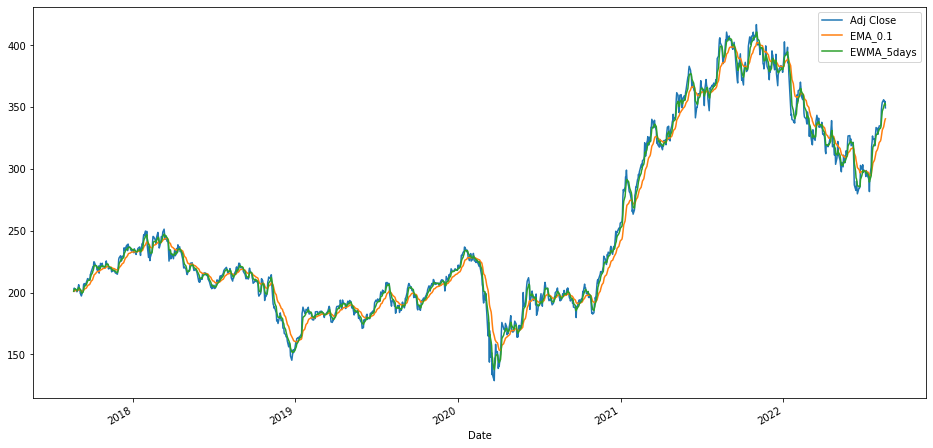

In [46]:
gs[['Adj Close','EMA_0.1','EWMA_5days']].plot(figsize=(16,8))

In [47]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-08-21 to 2022-08-19
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   High                         1259 non-null   float64
 1   Low                          1259 non-null   float64
 2   Open                         1259 non-null   float64
 3   Close                        1259 non-null   float64
 4   Volume                       1259 non-null   float64
 5   Adj Close                    1259 non-null   float64
 6   Adj Close : 5 days Rolling   1255 non-null   float64
 7   Adj Close : 15 days Rolling  1245 non-null   float64
 8   Adj Close : 30 days Rolling  1230 non-null   float64
 9   Adj Close : 5 days CMA       1255 non-null   float64
 10  Adj Close : 15 days CMA      1245 non-null   float64
 11  Adj Close : 30 days CMA      1230 non-null   float64
 12  EMA_0.1                      1259 non-null   float64
 13  

<AxesSubplot:xlabel='Date'>

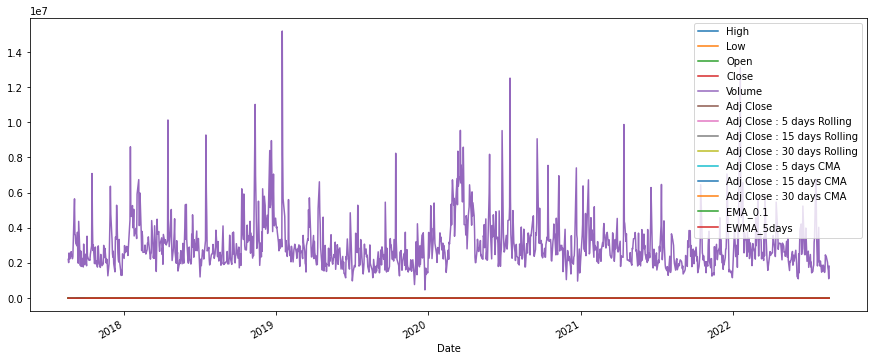

In [48]:
gs.plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

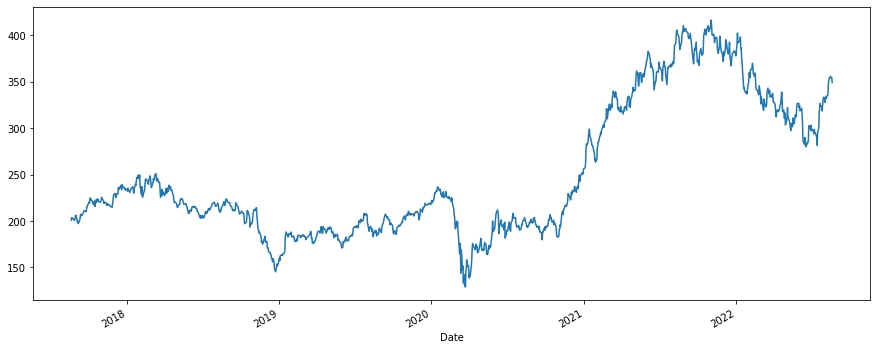

In [49]:
gs['Adj Close'].plot(figsize=(15,6))

# dickey fuller test

In [50]:
df =pd.DataFrame(gs['Adj Close']) 
df

,Adj Close
Date,
2017-08-21,201.017822
2017-08-22,203.557983
2017-08-23,202.793198
2017-08-24,203.020813
2017-08-25,202.547363
...,...
2022-08-15,355.850006
2022-08-16,354.970001
2022-08-17,353.739990


In [51]:
type(df)

pandas.core.frame.DataFrame

In [52]:
# Rolling statistics for 12 month

rolmean = df['Adj Close'].rolling(window = 12).mean()
rolstd = df['Adj Close'].rolling(window = 12).std()

print(rolmean,rolstd)

Date
2017-08-21           NaN
2017-08-22           NaN
2017-08-23           NaN
2017-08-24           NaN
2017-08-25           NaN
                 ...    
2022-08-15    339.468335
2022-08-16    341.266668
2022-08-17    343.071668
2022-08-18    345.291667
2022-08-19    346.633331
Name: Adj Close, Length: 1259, dtype: float64 Date
2017-08-21          NaN
2017-08-22          NaN
2017-08-23          NaN
2017-08-24          NaN
2017-08-25          NaN
                ...    
2022-08-15     9.871943
2022-08-16    10.602553
2022-08-17    10.739256
2022-08-18    10.044377
2022-08-19     9.327751
Name: Adj Close, Length: 1259, dtype: float64


In [53]:
df['Rolmean']= rolmean

In [54]:
df['Rolstd']=rolstd
df

,Adj Close,Rolmean,Rolstd
Date,,,
2017-08-21,201.017822,NaN,NaN
2017-08-22,203.557983,NaN,NaN
2017-08-23,202.793198,NaN,NaN
2017-08-24,203.020813,NaN,NaN
2017-08-25,202.547363,NaN,NaN
...,...,...,...
2022-08-15,355.850006,339.468335,9.871943
2022-08-16,354.970001,341.266668,10.602553
2022-08-17,353.739990,343.071668,10.739256


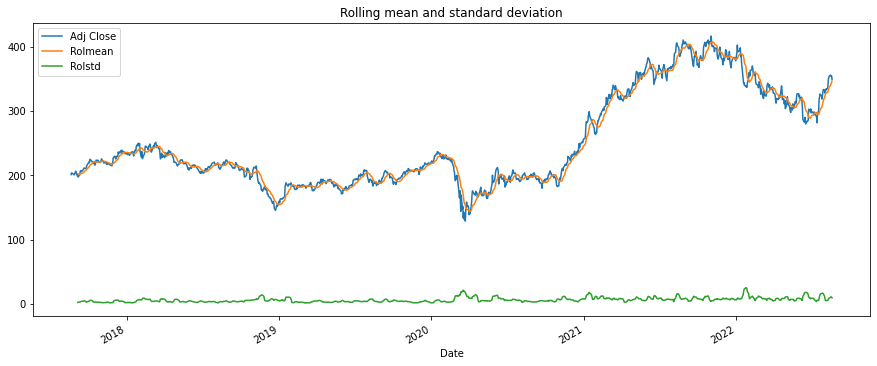

In [55]:
# rolling statistics plots

df[['Adj Close','Rolmean','Rolstd']].plot(title = 'Rolling mean and standard deviation',figsize = (15,6));

In [56]:
df.dropna(inplace = True)

In [57]:
df.ndim

2

# seasonal data decompostion

In [58]:
df

,Adj Close,Rolmean,Rolstd
Date,,,
2017-09-06,199.913803,202.276335,2.072287
2017-09-07,197.182236,201.956703,2.529429
2017-09-08,198.433838,201.529691,2.663499
2017-09-11,201.950989,201.459507,2.638154
2017-09-12,206.418289,201.742630,2.980976
...,...,...,...
2022-08-15,355.850006,339.468335,9.871943
2022-08-16,354.970001,341.266668,10.602553
2022-08-17,353.739990,343.071668,10.739256


<AxesSubplot:title={'center':'seasional data'}, xlabel='Date'>

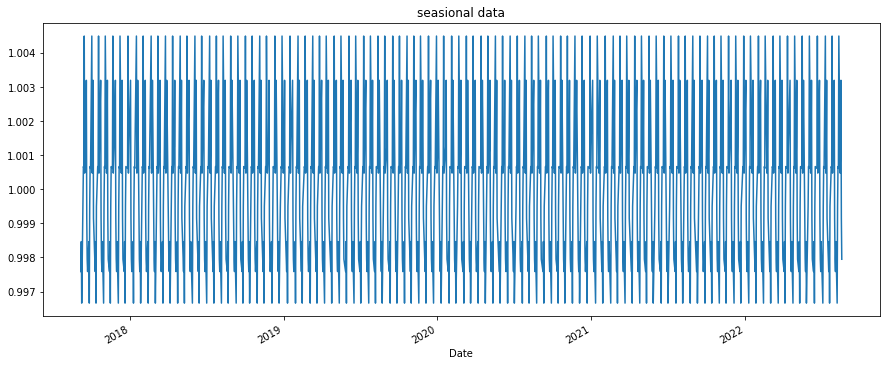

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Adj Close'], model='multiplicable', period=12)
result.seasonal.plot(title = 'seasional data',figsize = (15,6))

<AxesSubplot:title={'center':'Trend data'}, xlabel='Date'>

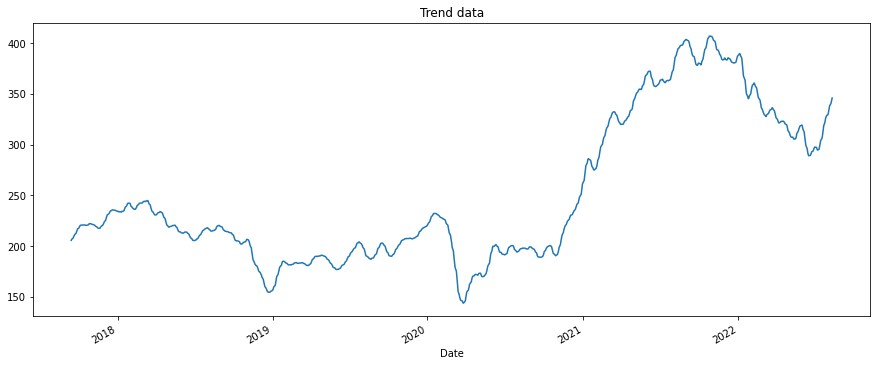

In [60]:
result.trend.plot(title = 'Trend data',figsize = (15,6))


<AxesSubplot:title={'center':'Residual data'}, xlabel='Date'>

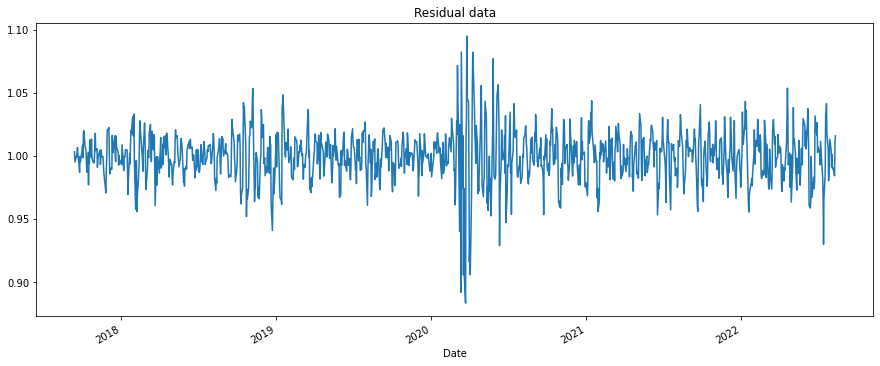

In [61]:
result.resid.plot(title = 'Residual data',figsize = (15,6))

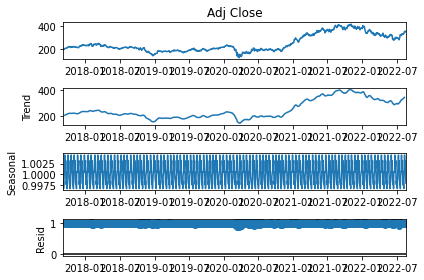

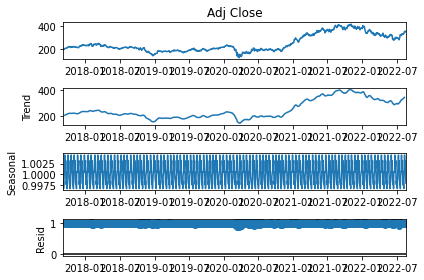

In [62]:
result.plot()

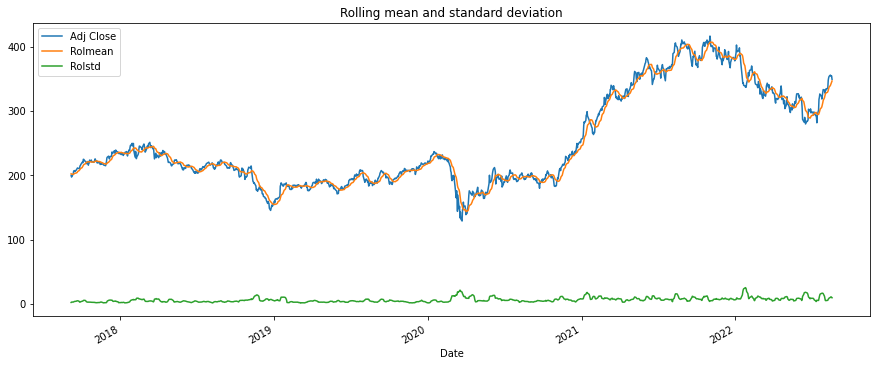

In [63]:
df[['Adj Close','Rolmean','Rolstd']].plot(title = 'Rolling mean and standard deviation',figsize = (15,6));

In [64]:
from statsmodels.tsa.stattools import adfuller

In [65]:
def adf_test(Series):
    result=adfuller(Series)
    print('ADF statistics : {}'.format(result[0]))
    print('P value : {}'.format(result[1]))
    
    if result[1] <= 0.05:
        print('stationary data')
        
    else:
        print('Not stationary data ')
        
        

In [66]:
adf_test(df['Adj Close'])

ADF statistics : -0.8568343025880366
P value : 0.8018550848997188
Not stationary data 


In [67]:
# making data stationary by differencing

df['first Defference'] = df['Adj Close'] - df['Adj Close'].shift(1)
df

,Adj Close,Rolmean,Rolstd,first Defference
Date,,,,
2017-09-06,199.913803,202.276335,2.072287,NaN
2017-09-07,197.182236,201.956703,2.529429,-2.731567
2017-09-08,198.433838,201.529691,2.663499,1.251602
2017-09-11,201.950989,201.459507,2.638154,3.517151
2017-09-12,206.418289,201.742630,2.980976,4.467300
...,...,...,...,...
2022-08-15,355.850006,339.468335,9.871943,2.029999
2022-08-16,354.970001,341.266668,10.602553,-0.880005
2022-08-17,353.739990,343.071668,10.739256,-1.230011


In [68]:
df.dropna(inplace =True)


In [69]:
df

,Adj Close,Rolmean,Rolstd,first Defference
Date,,,,
2017-09-07,197.182236,201.956703,2.529429,-2.731567
2017-09-08,198.433838,201.529691,2.663499,1.251602
2017-09-11,201.950989,201.459507,2.638154,3.517151
2017-09-12,206.418289,201.742630,2.980976,4.467300
2017-09-13,206.975586,202.111649,3.341890,0.557297
...,...,...,...,...
2022-08-15,355.850006,339.468335,9.871943,2.029999
2022-08-16,354.970001,341.266668,10.602553,-0.880005
2022-08-17,353.739990,343.071668,10.739256,-1.230011


In [70]:
adf_test(df['first Defference'])

ADF statistics : -12.316397282643686
P value : 6.90624296856848e-23
stationary data


In [71]:
## for 12 month

df['12M Deff'] = df['Adj Close'] - df['Adj Close'].shift(12)
df

,Adj Close,Rolmean,Rolstd,first Defference,12M Deff
Date,,,,,
2017-09-07,197.182236,201.956703,2.529429,-2.731567,NaN
2017-09-08,198.433838,201.529691,2.663499,1.251602,NaN
2017-09-11,201.950989,201.459507,2.638154,3.517151,NaN
2017-09-12,206.418289,201.742630,2.980976,4.467300,NaN
2017-09-13,206.975586,202.111649,3.341890,0.557297,NaN
...,...,...,...,...,...
2022-08-15,355.850006,339.468335,9.871943,2.029999,26.740021
2022-08-16,354.970001,341.266668,10.602553,-0.880005,21.579987
2022-08-17,353.739990,343.071668,10.739256,-1.230011,21.660004


In [72]:
df.dropna(inplace =True)


In [73]:
df

,Adj Close,Rolmean,Rolstd,first Defference,12M Deff
Date,,,,,
2017-09-25,210.355759,207.199407,3.818154,-0.703430,13.173523
2017-09-26,210.063400,208.168537,2.704507,-0.292358,11.629562
2017-09-27,214.466751,209.211517,2.493881,4.403351,12.515762
2017-09-28,215.115387,209.936275,2.847074,0.648636,8.697098
2017-09-29,216.686722,210.745537,3.276752,1.571335,9.711136
...,...,...,...,...,...
2022-08-15,355.850006,339.468335,9.871943,2.029999,26.740021
2022-08-16,354.970001,341.266668,10.602553,-0.880005,21.579987
2022-08-17,353.739990,343.071668,10.739256,-1.230011,21.660004


In [74]:
adf_test(df['12M Deff'])

ADF statistics : -6.918676497480055
P value : 1.1615622188757272e-09
stationary data


In [75]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

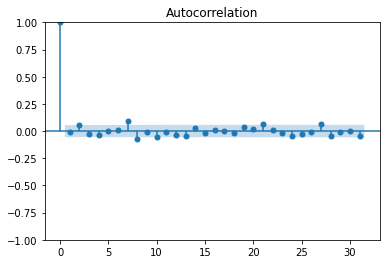

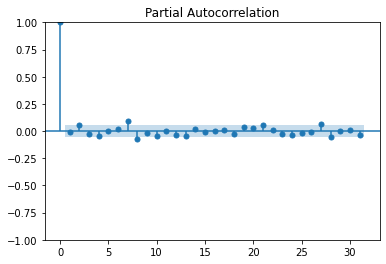

In [76]:
acf = plot_acf(df['first Defference']);
pacf = plot_pacf(df['first Defference']);

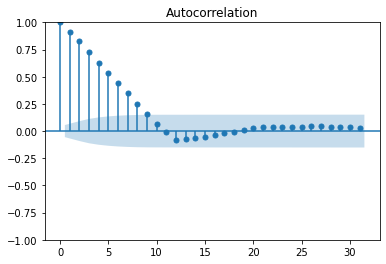

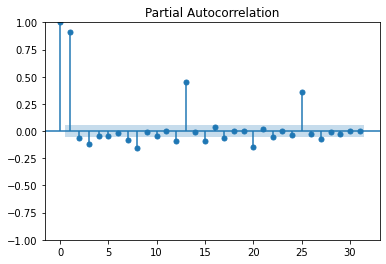

In [77]:
# acf and pacf chart
acf12 = plot_acf(df['12M Deff']) 
pacf12 = plot_pacf(df['12M Deff'])                     

In [78]:
df

,Adj Close,Rolmean,Rolstd,first Defference,12M Deff
Date,,,,,
2017-09-25,210.355759,207.199407,3.818154,-0.703430,13.173523
2017-09-26,210.063400,208.168537,2.704507,-0.292358,11.629562
2017-09-27,214.466751,209.211517,2.493881,4.403351,12.515762
2017-09-28,215.115387,209.936275,2.847074,0.648636,8.697098
2017-09-29,216.686722,210.745537,3.276752,1.571335,9.711136
...,...,...,...,...,...
2022-08-15,355.850006,339.468335,9.871943,2.029999,26.740021
2022-08-16,354.970001,341.266668,10.602553,-0.880005,21.579987
2022-08-17,353.739990,343.071668,10.739256,-1.230011,21.660004


# train and test data set

In [79]:
from datetime import datetime,timedelta
train_data_end = datetime(2021,8,1)
test_data_end = datetime(2022,8,1)

In [80]:
train_data =df[:train_data_end]
test_data = df[train_data_end + timedelta(days=1):test_data_end]

# prediction

In [81]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [82]:
test_data

,Adj Close,Rolmean,Rolstd,first Defference,12M Deff
Date,,,,,
2021-08-02,369.926147,363.555929,6.687839,3.237701,4.734283
2021-08-03,372.048676,364.824259,6.739075,2.122528,15.219971
2021-08-04,369.603333,366.710457,3.824579,-2.445343,22.634369
2021-08-05,375.902588,368.303207,3.254797,6.299255,19.113007
2021-08-06,389.195679,370.291295,6.720440,13.293091,23.857056
...,...,...,...,...,...
2022-07-26,318.549988,307.101664,16.406825,-5.570007,22.079987
2022-07-27,324.540009,309.714999,16.485122,5.990021,31.360016
2022-07-28,329.109985,312.763331,16.400347,4.569977,36.579987


In [83]:
train_data

,Adj Close,Rolmean,Rolstd,first Defference,12M Deff
Date,,,,,
2017-09-25,210.355759,207.199407,3.818154,-0.703430,13.173523
2017-09-26,210.063400,208.168537,2.704507,-0.292358,11.629562
2017-09-27,214.466751,209.211517,2.493881,4.403351,12.515762
2017-09-28,215.115387,209.936275,2.847074,0.648636,8.697098
2017-09-29,216.686722,210.745537,3.276752,1.571335,9.711136
...,...,...,...,...,...
2021-07-26,367.686127,363.254326,6.699215,1.809540,16.589386
2021-07-27,366.649323,363.505384,6.770912,-1.036804,3.012695
2021-07-28,366.052673,362.994303,6.269009,-0.596649,-6.132965


# auto_arima from pmdarima

In [84]:
import pmdarima as pm
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [85]:
stepwise_fit = auto_arima(train_data['Adj Close'],trace = True, suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5557.783, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5562.497, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5558.388, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5559.239, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5561.879, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5555.852, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5554.426, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5555.650, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5556.316, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5557.421, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5553.786, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5558.841, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5555.261, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=5555.090, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]          

In [86]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  969
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -2773.893
Date:                Sun, 21 Aug 2022   AIC                           5553.786
Time:                        01:47:11   BIC                           5568.411
Sample:                             0   HQIC                          5559.353
                                - 969                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0677      0.018     -3.790      0.000      -0.103      -0.033
ma.L2          0.0876      0.021      4.168      0.000       0.046       0.129
sigma2        18.0525      0.486     37.172      0.000      17.101      19.004
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               635.17
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               2.30   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# ARIMA model

In [87]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [88]:
from statsmodels.tsa.arima.model import ARIMA
model_arima=ARIMA(train_data['Adj Close'],order=(0,1,2))
model_fit=model_arima.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  969
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -2773.893
Date:                Sun, 21 Aug 2022   AIC                           5553.786
Time:                        01:47:11   BIC                           5568.411
Sample:                             0   HQIC                          5559.353
                                - 969                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0677      0.018     -3.790      0.000      -0.103      -0.033
ma.L2          0.0876      0.021      4.168      0.000       0.046       0.129
sigma2        18.0525      0.486     37.172      0.000      17.101      19.004
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               635.17
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               2.30   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Prediction

In [89]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

print(pred_start_date)
print(pred_end_date)

2021-08-02 00:00:00
2022-08-01 00:00:00


In [90]:
# above limit gives error for start index not matched then trying below method

start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [91]:
start,end

(969, 1220)

In [92]:
# calling model for prediction

pred = model_fit.predict(start = start, end = end,type = 'levels')

In [93]:
pred

969     367.132004
970     366.929033
971     366.929033
972     366.929033
973     366.929033
           ...    
1216    366.929033
1217    366.929033
1218    366.929033
1219    366.929033
1220    366.929033
Name: predicted_mean, Length: 252, dtype: float64

In [94]:
test_data

,Adj Close,Rolmean,Rolstd,first Defference,12M Deff
Date,,,,,
2021-08-02,369.926147,363.555929,6.687839,3.237701,4.734283
2021-08-03,372.048676,364.824259,6.739075,2.122528,15.219971
2021-08-04,369.603333,366.710457,3.824579,-2.445343,22.634369
2021-08-05,375.902588,368.303207,3.254797,6.299255,19.113007
2021-08-06,389.195679,370.291295,6.720440,13.293091,23.857056
...,...,...,...,...,...
2022-07-26,318.549988,307.101664,16.406825,-5.570007,22.079987
2022-07-27,324.540009,309.714999,16.485122,5.990021,31.360016
2022-07-28,329.109985,312.763331,16.400347,4.569977,36.579987


In [95]:
print(pred)

969     367.132004
970     366.929033
971     366.929033
972     366.929033
973     366.929033
           ...    
1216    366.929033
1217    366.929033
1218    366.929033
1219    366.929033
1220    366.929033
Name: predicted_mean, Length: 252, dtype: float64


In [96]:
# make prediction in datetime format

pred.index = test_data.index

print(pred)


Date
2021-08-02    367.132004
2021-08-03    366.929033
2021-08-04    366.929033
2021-08-05    366.929033
2021-08-06    366.929033
                 ...    
2022-07-26    366.929033
2022-07-27    366.929033
2022-07-28    366.929033
2022-07-29    366.929033
2022-08-01    366.929033
Name: predicted_mean, Length: 252, dtype: float64


<AxesSubplot:xlabel='Date'>

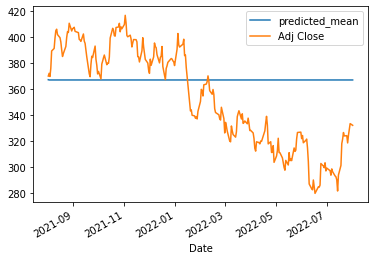

In [97]:
pred.plot(legend = True)

test_data['Adj Close'].plot(legend = True)

observation:  due more seasonality in data our model only calculated mean value 

In [98]:
# compare prediction and real truth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_data['Rolmean'],pred)

33.721869389175204